In [3]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor


import sys
import os

sys.path.append(os.path.abspath("../../.."))

from utils.scatter_plot import scatter_prediction
from utils.eval_call import evaluate_model

from Preprocessing.imputation import get_imputation_maps, apply_imputation,ContextImputer
from Preprocessing.preprocessing_pipeline_impute import preprocessing_pipeline
from Preprocessing.preprocessing_pipeline_segment import preprocessing_pipeline_segment
from Preprocessing.split_new import split_data

KNN Regression Performance Metrics:
MAE: 4247.32
MSE: 183385218.22
RMSE: 13541.98
R²: 0.79
------------------------------


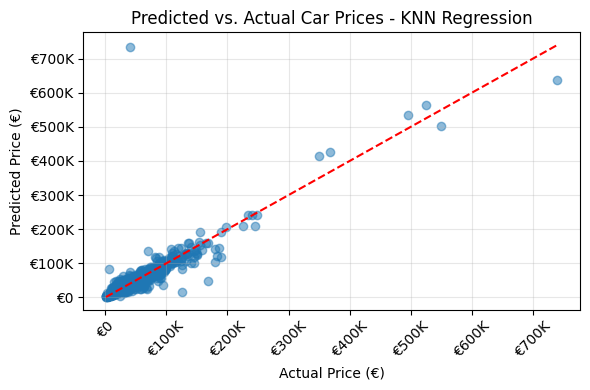

In [4]:
def main():


    X_train, X_test, y_train, y_test, categorical_features , numeric_features = split_data('../../../data.csv', fuel_type = ['Electric', 'CNG', 'Hybrid', 'Hydrogen', 'LPG'])

    # Preprocessing-Pipelines erstellen
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])


    knn_pipeline = Pipeline(steps=[
        ('imp_fc', ContextImputer('fuel_consumption_l_100km')),
        ('imp_ps', ContextImputer('power_ps')),
        ('imp_er', ContextImputer('electric_range')),
        ('preprocessor', preprocessor),
        ('model', KNeighborsRegressor())
    ])

    # Modell trainieren
    knn_pipeline.fit(X_train, y_train)

    # Vorhersagen treffen
    y_pred_knn = knn_pipeline.predict(X_test)



    evaluate_model(y_test, y_pred_knn, "KNN Regression")
    scatter_prediction(y_test, y_pred_knn, "KNN Regression")


if __name__ == "__main__":
    main()